<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Compare-against-PRECISE" data-toc-modified-id="Compare-against-PRECISE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare against PRECISE</a></span><ul class="toc-item"><li><span><a href="#Identify-new-components" data-toc-modified-id="Identify-new-components-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Identify new components</a></span><ul class="toc-item"><li><span><a href="#Component-11" data-toc-modified-id="Component-11-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Component 11</a></span></li></ul></li><li><span><a href="#Investigate-component-weightings" data-toc-modified-id="Investigate-component-weightings-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Investigate component weightings</a></span></li></ul></li></ul></div>

**This notebook is only relevant if you are appending E. coli data to PRECISE**

# Setup

In [1]:
import sys
sys.path.append('../')
from icaviz.plotting import *
from tqdm import tqdm_notebook as tqdm

In [2]:
DATA_DIR = '../data/example_data/'
PRECISE_DIR = '../data/precise_data/'
GENE_DIR = '../data/annotation/'

In [3]:
ica_data = load_data(X=DATA_DIR+'log_tpm.csv',
                     S=DATA_DIR+'S.csv',
                     A=DATA_DIR+'A.csv',
                     metadata=DATA_DIR+'metadata.csv',
                     annotation=GENE_DIR+'gene_info.csv',
                     trn=GENE_DIR+'TRN.csv',
                     cutoff = 750) # Get correct cut-off score from 3_estimate_thresholds

In [4]:
enrich = pd.read_csv(PRECISE_DIR+'curated_enrichments.csv')
names = enrich['name'].tolist()
precise = load_data(X=PRECISE_DIR+'log_tpm.csv',
                     S=PRECISE_DIR+'S.csv',
                     A=PRECISE_DIR+'A.csv',
                     metadata=PRECISE_DIR+'metadata.csv',
                     annotation=GENE_DIR+'gene_info.csv',
                     trn=GENE_DIR+'TRN.csv',
                     cutoff = 550,names=names)

# Compare against PRECISE

In [5]:
dot,links = compare_ica(precise.S,ica_data.S,cutoff=0.3)

You may either view the comparison in the Jupyter notebook, or save it to a png

In [6]:
dot.save('comparison.png')

'comparison.png'

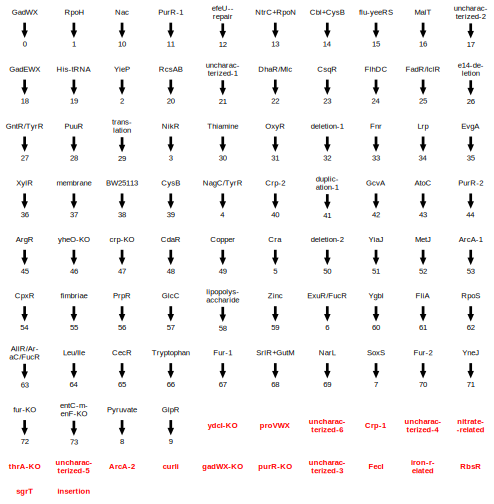

In [7]:
dot

## Identify new components

### Component 11
As an example, let's start with component 11. Component 11 is enriched with genes in the purine biosynthetic pathway, many of which are regulated by PurR. We see that component 11 has the lowest activity (i.e. genes with positive components have lowest expression) when adenine is present in the media.

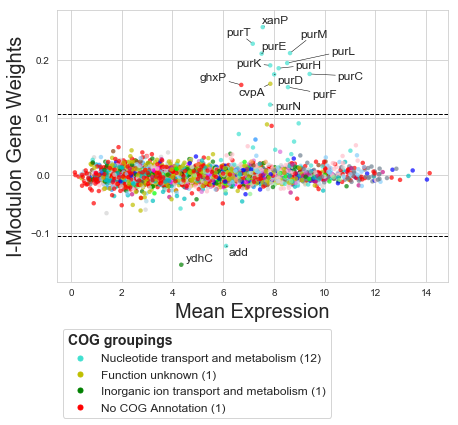

In [8]:
plot_genes(ica_data,11)

[(<matplotlib.axes._subplots.AxesSubplot at 0x7fdbd0ef3eb8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fdbd0e68780>)]

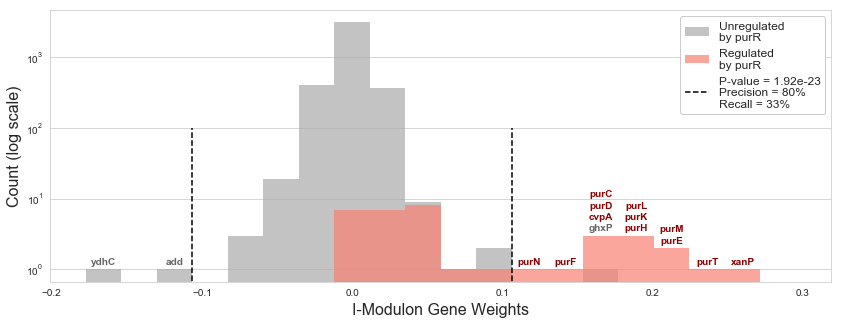

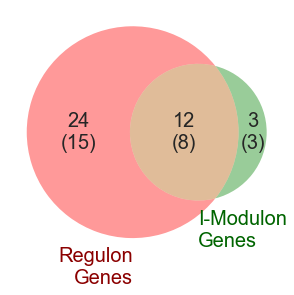

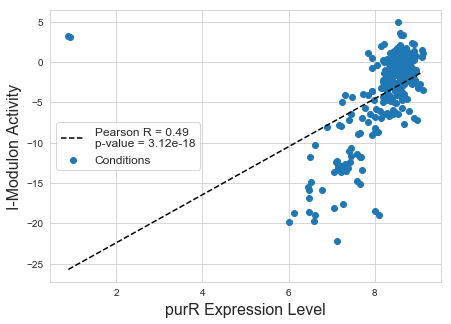

In [9]:
plot_regulon(ica_data,11)

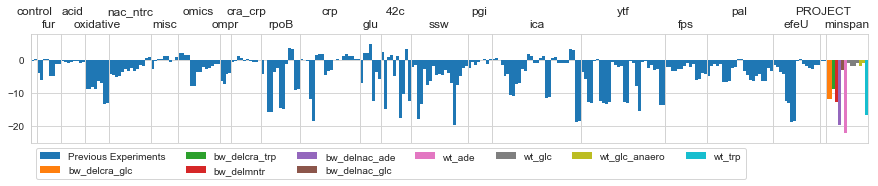

In [10]:
plot_samples_bar(ica_data,11,project='minspan')

## Investigate component weightings

First, let's identify the components with the strongest absolute weightings in the new project

In [12]:
target_activities = ica_data.A[ica_data.metadata[ica_data.metadata.project_id=='PROJECT'].index]
ordered_comps = abs(target_activities.max(axis=1)).sort_values(ascending=False)
ordered_comps.head()

59    21.806577
49     9.115796
24     7.257241
67     6.970954
55     6.096674
dtype: float64

Now let's plot the components. We will be using the links variable created by `compare_ica` to title the plots. Here I am only plotting the first 5 components. Usually, we require an absolute activity above 10 to consider a component as significant.

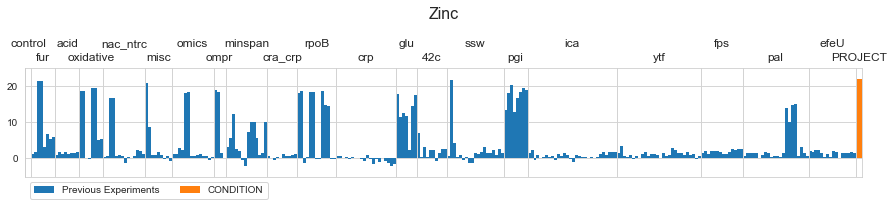

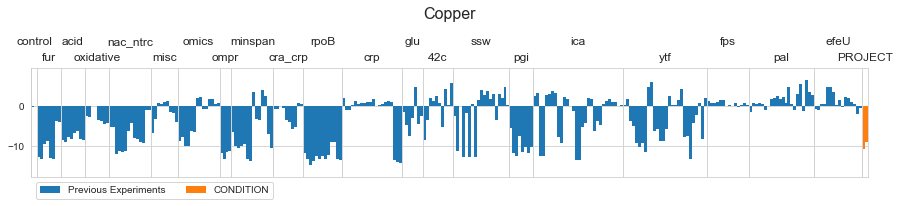

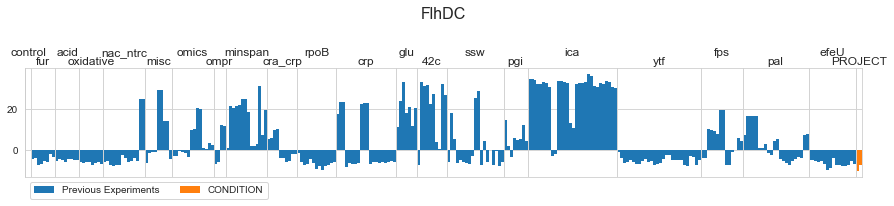

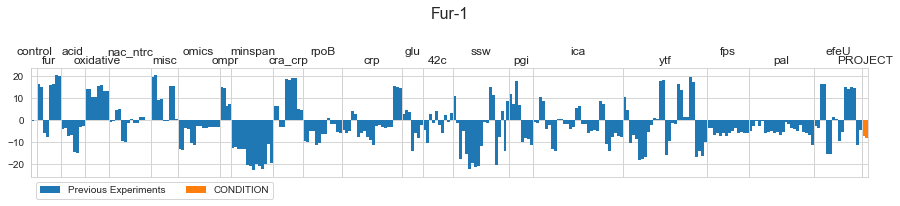

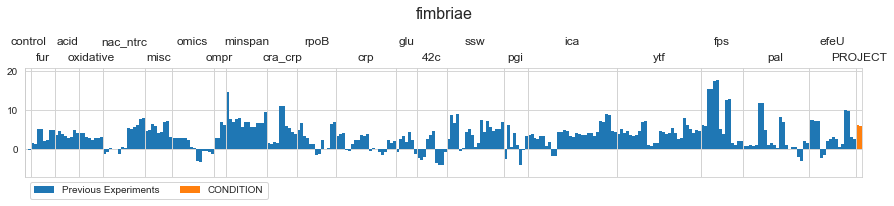

In [13]:
for k in ordered_comps.index[:5]:
    link_row = np.where(str(k) == np.array(links))[0]
    if len(link_row) > 0:
        title = np.array(links)[link_row[0],0]
    else:
        title = 'New Component %d'%k
    ax = plot_samples_bar(ica_data,k,project='PROJECT')
    ax.set_title(title,fontsize=16,y=1.4)